In [2]:
from PIL import Image
import os
import numpy as np
import math


In [3]:
os.listdir()

['.config', 'ForestCover.jpg', 'sample_data']

In [4]:
img = Image.open('ForestCover.jpg')

In [4]:
img.size

(14400, 9600)

In [7]:
MARGIN = .75
US_LETTER_WIDTH_INCHES = 8.5 - MARGIN
US_LETTER_HEIGHT_INCHES = 11 - MARGIN
DPI = 300
LANDSCAPE_ORIENTATION = True
ORIENTATION = 'Landscape' if LANDSCAPE_ORIENTATION else 'Portrait'
savename = 'worldmap'

print(f"US Letter Width: {US_LETTER_WIDTH_INCHES + MARGIN} inches")
print(f"US Letter Height: {US_LETTER_HEIGHT_INCHES + MARGIN} inches")
print(f"DPI: {DPI}")
print(f"Orientation: {ORIENTATION}")

US Letter Width: 8.5 inches
US Letter Height: 11.0 inches
DPI: 300
Orientation: Landscape


In [6]:


image_width_px, image_height_px = img.size

# effective width and height of US Letter sheet in pixels
if LANDSCAPE_ORIENTATION:
  sheet_width_px = int(US_LETTER_HEIGHT_INCHES * DPI)
  # this does not account for margin
  sheet_height_px = int(US_LETTER_WIDTH_INCHES * DPI)
else:
  sheet_width_px = int(US_LETTER_WIDTH_INCHES * DPI)
  # this does not account for margin
  sheet_height_px = int(US_LETTER_HEIGHT_INCHES * DPI)

num_horizontal_sheets = math.ceil(image_width_px / sheet_width_px)
num_vertical_sheets = math.ceil(image_height_px / sheet_height_px)

print(f"Image Width in Pixels: {image_width_px}")
print(f"Image Height in Pixels: {image_height_px}")
print(f"Sheet Width in Pixels: {sheet_width_px}")
print(f"Sheet Height in Pixels: {sheet_height_px}")
print(f"""Poster dimensions: {num_vertical_sheets} rows by {
    num_horizontal_sheets} columns""")

Image Width in Pixels: 14400
Image Height in Pixels: 9600
Sheet Width in Pixels (considering orientation and DPI): 3075
Sheet Height in Pixels (considering orientation and DPI): 2325
Number of horizontal sheets needed: 5
Number of vertical sheets needed: 5


In [7]:
img_arr = np.array(img)

ideal_h, ideal_w = (int(np.ceil(
      img_arr.shape[0]/sheet_height_px)*sheet_height_px),
                    int(np.ceil(
      img_arr.shape[1]/sheet_width_px)*sheet_width_px))
ideal_arr = np.ones((ideal_h,ideal_w,3)) * 254
ideal_arr[:img_arr.shape[0],:img_arr.shape[1],:] = img_arr
# padded image to get complete sheets
# when we run out of picture
# padd with 254s to get mostly white background

In [8]:
imgs = []
for h in range(num_horizontal_sheets):
  for v in range(num_vertical_sheets):
    x,y = h*sheet_width_px, v*sheet_height_px
    this_img = ideal_arr[y:y+sheet_height_px,x:x+sheet_width_px,:]
    imgs.append(this_img.astype(np.uint8))

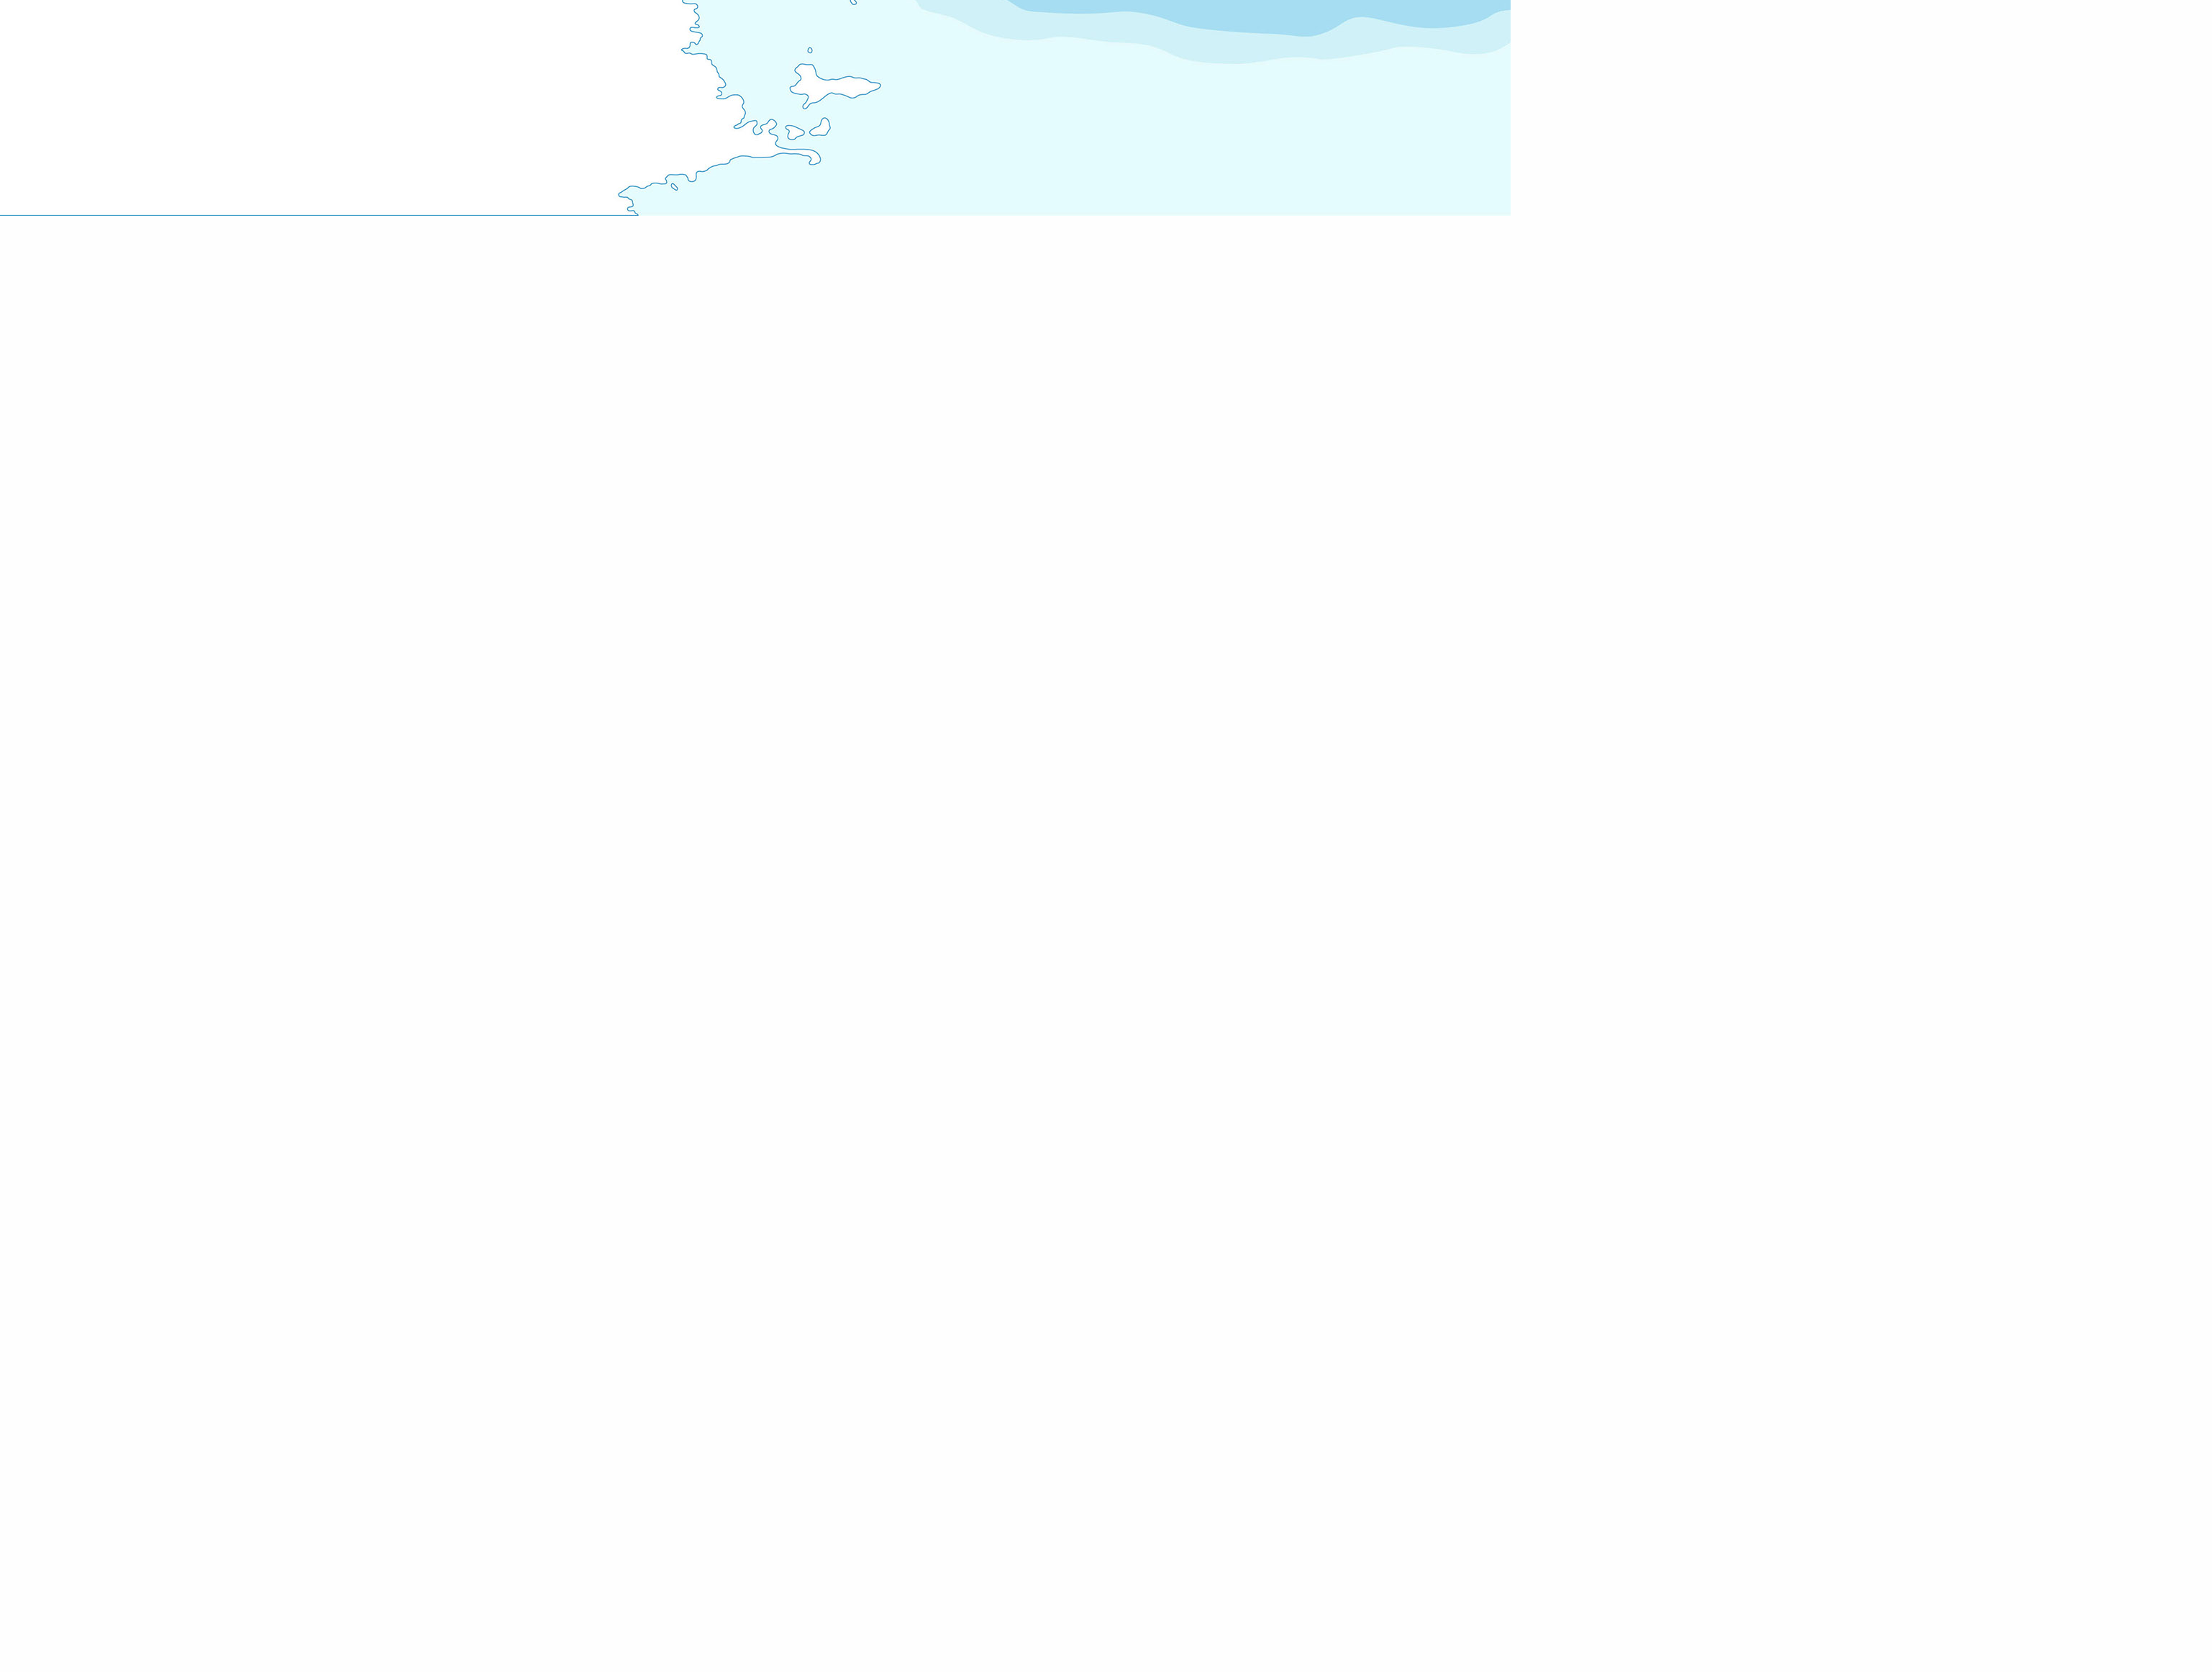

In [9]:
Image.fromarray(imgs[-1])

In [11]:
def pad_image(image, inches = .5):
    '''
    feed an array, get a padded array,
    #tensorflow throwbacks
    '''
    height, width, pixs = image.shape
    # Calculate the padding in pixels
    pad = int(inches * DPI)
    out = np.ones((height + 2*pad,
                    width + 2*pad,
                    3)) * 254
    # Pad with 245s, not ones or zeros
    # so that padding is white-ish
    out[pad:pad+height, pad:pad+width, :] = image
    return out

In [12]:

# numpy arrays in imgs to PIL Image objects
pil_images = [
    Image.fromarray(
        pad_image(
        img_array).astype(np.uint8)) for img_array in imgs]


# all images to a single PDF
if pil_images:
    first_image = pil_images[0]
    remaining_images = pil_images[1:]
    pdf_filename = f"{savename}.pdf"
    first_image.save(pdf_filename,
      save_all=True, append_images=remaining_images)
    print(f"All image parts saved to {pdf_filename}")
else:
    print("No images to save.")

All image parts saved to worldmap.pdf
